# 传统的方法

In [10]:
simple_grammar="""
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj*  noun
Adj* => null |Adj Adj*
verb_phrase => verb noun_phrase
Article => 一个 | 这个 | 一只
noun => 女人 | 篮球 | 桌子 | 小猫
verb => 看着 | 坐着 | 听着 |看见
Adj => 蓝色的 | 好看的 | 小小的 |很酷的
"""

In [11]:
another_grammar="""
#
"""

In [12]:
import random

In [13]:
def adj():return random.choice('蓝色的 |好看的 |小小的'.split('|')).split()[0]
adj()

'小小的'

In [14]:
def adj_star():
    #choice里返回的是一个lambda表达式所以需要一个括号
    return random.choice([lambda:'',lambda:adj()+adj_star()])()


In [15]:
adj_star()

''

In [16]:
adj_grammar="""
Adj* => null| Adj Adj*
Adj => 蓝色的 |好看的 |小小的
"""

In [17]:
def create_grammar(grammar_str,split='=>',line_split='\n'):
    grammar={}
    for line in grammar_str.split(line_split):
        if not line.strip():continue
        exp,stmt=line.split(split)
        grammar[exp.strip()]=[s.split() for s in stmt.split('|')]
    return grammar

In [18]:
grammar=create_grammar(adj_grammar)
grammar['Adj*']

[['null'], ['Adj', 'Adj*']]

In [19]:
choice=random.choice  #将random.choice赋值给choice

In [20]:
def generate(gram,target):
    if target not in gram:return target#说明target已经是最后一个节点了
    expaned=[generate(gram,t) for t in choice(gram[target])]#递归调用继续向下去查找获取
    return ''.join([e if e!='\n' else '/n' for e in expaned if e!='null'])#如果e不为\n 、/n、null则输出 
    

In [21]:
example_grammar = create_grammar(simple_grammar)

In [22]:
example_grammar

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个'], ['一只']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐着'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的'], ['很酷的']]}

In [23]:
generate(gram=example_grammar,target='sentence')

'一只女人看见这个很酷的篮球'

# 模仿西部世界

In [24]:
#西部世界里，一个人类的语言定义
human="""
human= 自己 寻找 活动
自己= 我 | 俺 | 我们 | 我俩
寻找= 找找 | 想找点
活动= 乐子 | 玩的 | 喝酒 
"""
#一个“接待员”的语言可以定义为
host="""
host= 寒暄 报数 询问 业务相关 结尾
报数= 我是 数字 号，
数字= 单个数字 |数字 单个数字
单个数字= 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9
寒暄= 称谓 打招呼 | 打招呼
称谓= 人称 ，
人称= 先生 | 女生 | 小朋友
打招呼= 你好 | 您好
询问= 请问你要 | 您需要
业务相关= 玩玩 具体业务
玩玩= null
具体业务 = 喝酒 | 打牌 |打猎 |赌博
结尾= 码？
"""

In [25]:
for i in range(20):
    print(generate(gram=create_grammar(human,split='='),target='human'))

我找找玩的
俺想找点喝酒
俺想找点玩的
我俩想找点玩的
我们想找点乐子
我找找喝酒
我们想找点喝酒
我们想找点玩的
我们找找玩的
我俩想找点喝酒
我们想找点喝酒
我们想找点乐子
我们找找玩的
我俩想找点玩的
我俩想找点喝酒
我俩找找乐子
我俩找找玩的
我找找玩的
我们想找点喝酒
俺想找点喝酒


# 判断语境的正确

In [27]:
programming="""
stmt => if_exp | while_exp | assignment
assignment => var = var
if_exp => if( var ){/n .... stmt }
while_exp=> while( var ){/n .... stmt }
var => chars number
chars => char |char char
char => student | name | info | database | course
number => 1 | 2 | 3
"""

In [28]:
programming_1 = """
stmt => if_exp | while_exp | assignment 
assignment => var = var
if_exp => if ( var ) {\n .... stmt }
while_exp=> while ( var ) { \n .... stmt }
var => chars number
chars => char | char char
char => student | name | info  | database | course
number => 1 | 2 | 3
"""

In [29]:
print(generate(gram=create_grammar(programming,split='=>'),target="stmt"))

while(student2){/n....namename3=course2}


In [34]:
import random
import pandas as pd

In [35]:
random.choice(range(100))

6

In [36]:
filename='./sqlResult_1558435.csv'

In [37]:
content=pd.read_csv(filename,encoding='gb18030')

In [39]:
content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [40]:
articles=content['content'].tolist()

In [42]:
len(articles)   #未处理的数据包含标点符号

89611

In [43]:
 import re
import jieba

In [69]:
def token(string):
    return re.findall('\w+',string)

In [70]:
from collections import Counter  

In [71]:
with_jieba_cut=Counter(jieba.cut(articles[110]))

In [72]:
with_jieba_cut.most_common()[:10]


[('，', 88),
 ('的', 73),
 ('。', 39),
 ('\r\n', 27),
 ('了', 20),
 ('们', 18),
 ('工作队', 16),
 ('村民', 15),
 ('收割', 14),
 ('、', 12)]

In [73]:
''.join(token(articles[110]))#去掉符号后的段落

'在外国名著麦田里的守望者中作者想要守护麦田里如自己内心一般纯真的孩子们而驻村干部们也在这个炎热的夏天里撸袖子上阵真正做起了村民们的麦田守望者三夏时节不等人你看到了吗不停翻涌起伏仿若铺陈至天边的金黄麦浪中那若隐若现的人影是自治区新闻出版广电局驻和田市肖尔巴格乡合尼村工作队的队员与工作队组织的青年志愿者在这个炎热的夏季他们深入田间地头帮助村民们收割小麦扛起收麦机麦田中的每个人都显得兴致勃勃一天下来就近22亩小麦收割完毕志愿者麦麦提亚森擦去满脸的汗水高兴地告诉驻村队员我们青年志愿者应该多做贡献为村里的脱贫致富出把力工作队带着我们为村里的老人服务看到那些像我爷爷奶奶一样的老人赞许感谢的目光我体会到了帮助他人的快乐自治区新闻出版广电局驻村工作队孙敏艾力依布拉音麦收时节我们在一起6月中旬的和田墨玉麦田金黄静待收割6月14日15日两天自治区高级人民法院驻和田地区墨玉县吐外特乡罕勒克艾日克村工作队与48名村民志愿者一道帮助村里29户有需要的村民进行小麦收割工作田间地头罕勒克艾日克村志愿队的红旗迎风飘扬格外醒目10余台割麦机一起轰鸣男人们在用机器收割小麦的同时几名妇女也加入到志愿队构成了一道美丽的麦收风景休息空闲工作队员和村民们坐在树荫下田埂上互相问好聊天语言交流有困难就用手势动作比划着聊天有趣地交流方式不时引来阵阵欢笑大家在一同享受丰收和喜悦也一同增进着彼此的情感和友谊自治区高级人民法院驻村工作队周春梅艾地艾木阿不拉细看稻菽千重浪6月15日自治区煤田灭火工程局的干部职工们再一次跋涉1000多公里来到了叶城县萨依巴格乡阿亚格欧尔达贝格村见到了自己的亲戚现场处处都透出掩盖不住的喜悦一声声亲切的谢谢一个个结实的拥抱都透露出浓浓的亲情没坐一会儿在嘘寒问暖中大家了解到在麦收的关键时刻部分村民家中却存在收割难的问题小麦成熟期短收获的时间集中天气的变化对小麦最终产量的影响极大如果不能及时收割会有不小损失的于是大家几乎立刻就决定要帮助亲戚们收割麦子在茂密的麦地里干部们每人手持一把镰刀一字排开挽起衣袖卷起裤腿挥舞着镰刀进行着无声的竞赛骄阳似火汗如雨下但这都挡不住大家的热情随着此起彼伏的镰刀割倒麦子的刷刷声响不一会一束束沉甸甸的麦穗就被整齐地堆放了起来当看到自己亲手收割的金黄色麦穗被一簇簇地打成捆运送到晒场每个人的脸上都露出了灿烂的笑容自治区煤田灭火工程局驻村工作队马浩南这是一个收获多多的季节6月1

In [74]:
articles_clean=[''.join(token(str(a))) for a in articles]

In [75]:
len(articles_clean)


89611

In [76]:
with open('article_9k.txt','w') as f:
    for a in articles_clean:
        f.write(a+'\n')

In [77]:
def cut(string):return list(jieba.cut(string))#jieba分词

In [78]:
import jieba

In [79]:
TOKEN=[]

In [81]:
for i,line in enumerate((open('article_9k.txt'))):
    if i%100==0:print(i)
    TOKEN+=cut(line)
        

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [82]:
TOKEN

['此外',
 '自',
 '本周',
 '6',
 '月',
 '12',
 '日起',
 '除',
 '小米',
 '手机',
 '6',
 '等',
 '15',
 '款',
 '机型',
 '外',
 '其余',
 '机型',
 '已',
 '暂停',
 '更新',
 '发布',
 '含',
 '开发',
 '版',
 '体验版',
 '内测',
 '稳定版',
 '暂不受',
 '影响',
 '以',
 '确保',
 '工程师',
 '可以',
 '集中',
 '全部',
 '精力',
 '进行',
 '系统优化',
 '工作',
 '有人',
 '猜测',
 '这',
 '也',
 '是',
 '将',
 '精力',
 '主要',
 '用到',
 'MIUI9',
 '的',
 '研发',
 '之中',
 'MIUI8',
 '去年',
 '5',
 '月',
 '发布',
 '距今已有',
 '一年',
 '有余',
 '也',
 '是',
 '时候',
 '更新换代',
 '了',
 '当然',
 '关于',
 'MIUI9',
 '的',
 '确切',
 '信息',
 '我们',
 '还是',
 '等待',
 '官方消息',
 '\n',
 '骁龙',
 '835',
 '作为',
 '唯一',
 '通过',
 'Windows10',
 '桌面',
 '平台',
 '认证',
 '的',
 'ARM',
 '处理器',
 '高通',
 '强调',
 '不会',
 '因为',
 '只',
 '考虑',
 '性能',
 '而',
 '去',
 '屏蔽掉',
 '小',
 '核心',
 '相反',
 '他们',
 '正',
 '联手',
 '微软',
 '找到',
 '一种',
 '适合',
 '桌面',
 '平台',
 '的',
 '兼顾',
 '性能',
 '和',
 '功耗',
 '的',
 '完美',
 '方案',
 '报道',
 '称',
 '微软',
 '已经',
 '拿到',
 '了',
 '一些',
 '新',
 '的',
 '源码',
 '以便',
 'Windows10',
 '更好',
 '地',
 '理解',
 'biglittle',
 '架构',
 '资料',
 '显示',
 '骁龙',
 '835',
 '作为',
 '一

In [84]:
type(list)

type

In [88]:
from functools import reduce

In [89]:
from operator import add,mul

In [90]:
reduce(add,[1,2,3,4,5])

15

In [91]:
[1,2,3]+[4,5,6]

[1, 2, 3, 4, 5, 6]

In [92]:
from collections import Counter

In [93]:
words_count=Counter(TOKEN)

In [98]:
words_count.most_common(100)

[('的', 887960),
 ('n', 382038),
 ('在', 310967),
 ('月', 208041),
 ('日', 178622),
 ('和', 164870),
 ('了', 158660),
 ('新华社', 143132),
 ('年', 139077),
 ('是', 131192),
 ('\n', 99612),
 ('１', 88933),
 ('０', 85640),
 ('中', 85043),
 ('外代', 83268),
 ('中国', 82215),
 ('将', 75480),
 ('2017', 72957),
 ('等', 72502),
 ('为', 71467),
 ('２', 71138),
 ('与', 70877),
 ('记者', 67881),
 ('也', 63396),
 ('对', 63391),
 ('二线', 62313),
 ('有', 60481),
 ('5', 60147),
 ('上', 57644),
 ('4', 54679),
 ('照片', 52614),
 ('他', 46724),
 ('发展', 46427),
 ('说', 45720),
 ('以', 42482),
 ('５', 41218),
 ('6', 39479),
 ('国际', 38924),
 ('到', 38447),
 ('不', 37990),
 ('都', 37474),
 ('３', 37305),
 ('从', 37002),
 ('人', 36911),
 ('nn', 35332),
 ('就', 35221),
 ('４', 34886),
 ('企业', 34731),
 ('后', 34477),
 ('并', 33980),
 ('比赛', 33197),
 ('被', 32852),
 ('进行', 31789),
 ('这', 31776),
 ('但', 31114),
 ('国家', 31067),
 ('６', 30874),
 ('美国', 30325),
 ('新', 30295),
 ('3', 29499),
 ('个', 29257),
 ('一个', 28704),
 ('表示', 28443),
 ('北京', 28156),
 ('还', 2

In [99]:
type(words_count)

collections.Counter

In [119]:
frequiences=[f for w, f  in words_count.most_common(100)]  #链式推导式
x=[i for i in range(100)]

In [117]:
print(frequiences)

[887960, 382038, 310967, 208041, 178622, 164870, 158660, 143132, 139077, 131192, 99612, 88933, 85640, 85043, 83268, 82215, 75480, 72957, 72502, 71467, 71138, 70877, 67881, 63396, 63391, 62313, 60481, 60147, 57644, 54679, 52614, 46724, 46427, 45720, 42482, 41218, 39479, 38924, 38447, 37990, 37474, 37305, 37002, 36911, 35332, 35221, 34886, 34731, 34477, 33980, 33197, 32852, 31789, 31776, 31114, 31067, 30874, 30325, 30295, 29499, 29257, 28704, 28443, 28156, 28106, 28081, 27975, 27472, 27321, 27212, 27096, 26676, 26646, 26500, 25835, 25724, 25249, 25160, 24908, 24473, 24084, 23322, 23310, 23176, 23007, 22879, 22827, 22404, 22170, 22085, 22014, 21867, 21798, 21760, 21631, 21482, 21063, 20946, 20881, 20792]


In [116]:
#%matplotlib inline

[[1, 1], [2, 4], [3, 9]]


In [118]:
import matplotlib.pyplot as plt

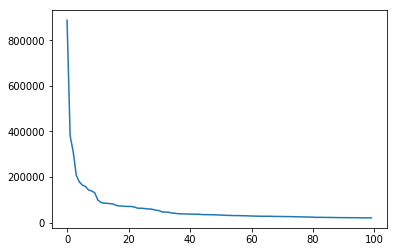

In [120]:
plt.plot(x,frequiences) #这样看起来数据很不平衡

In [121]:
import numpy as np 

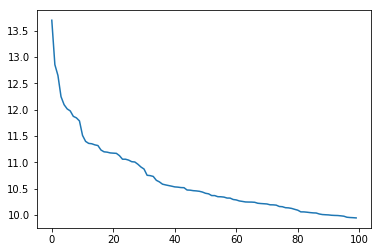

In [122]:
plt.plot(x,np.log(frequiences))  #使用log处理后 数据显示得不那么突兀

In [123]:
#计算单个词出现的概率
def prob_1(word):
    return words_count[word]/len(TOKEN)#等于单个词出现次数/总的词出现的次数
    

In [124]:
prob_1('我们')

0.0012070132896273528

In [128]:
TOKEN[:10]#获取前十个词

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [129]:
TOKEN=[str(x)for x in TOKEN]  #去空格

In [132]:
TOKEN[:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [134]:
TOKEN_2_GRAM=[''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]

In [135]:
TOKEN_2_GRAM[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [136]:
words_count_2=Counter(TOKEN_2_GRAM)

In [137]:
words_count_2.most_common(100)

[('\n新华社', 69252),
 ('2017年', 63976),
 ('外代二线', 61301),
 ('n新华社', 59795),
 ('日n', 52216),
 ('新华社照片', 50401),
 ('5月', 40088),
 ('4月', 35442),
 ('新华社记者', 31006),
 ('日在', 27814),
 ('２０', 27349),
 ('年5', 26017),
 ('6月', 25438),
 ('n当日', 25241),
 ('年4', 24068),
 ('n外代', 20854),
 ('照片外代', 20777),
 ('比赛中', 20757),
 ('外代2017', 20463),
 ('n5月', 20426),
 ('n4月', 19920),
 ('n体育', 19274),
 ('一带一路', 19006),
 ('００', 17830),
 ('n\n', 17781),
 ('０１', 17483),
 ('当日在', 16392),
 ('摄\n', 14832),
 ('１０', 12941),
 ('日电记者', 11879),
 ('完\n', 11342),
 ('二线足球', 11039),
 ('2016年', 10344),
 ('在比赛', 9834),
 ('举行的', 9799),
 ('也是', 9176),
 ('５月', 8614),
 ('的是', 8329),
 ('４月', 8320),
 ('更多', 8132),
 ('１６', 8068),
 ('１７', 7940),
 ('月1', 7843),
 ('n在', 7609),
 ('年6', 7481),
 ('月１', 7116),
 ('１２', 7097),
 ('月２', 6987),
 ('自己的', 6915),
 ('新华社欧新', 6876),
 ('３０', 6792),
 ('20162017赛季', 6782),
 ('１１', 6764),
 ('中的', 6750),
 ('１５', 6686),
 ('1日', 6580),
 ('１９', 6437),
 ('比0', 6286),
 ('上的', 6281),
 ('新华社北京', 6248),
 ('新华社法新'

In [139]:
#计算两个词出现的概率
def prob_2(word1,word2):
    if word1+word2 in words_count_2:
        return words_count_2[word1+word2]/len(TOKEN_2_GRAM)
    else:
        return 1/len(TOKEN_2_GRAM)

In [140]:
prob_2('我们','在')

3.336131742575629e-05

In [149]:
def get_probablity(sentence):
    words=cut(sentence)
   # print(words)
    sentence_pro=1 
    for i,word in enumerate(words[:-1]): #遍历这个list
        next_=words[i+1]                #返回next     
        probability=prob_2(word,next_)   #返回两个词的出现的概率
        sentence_pro*=probability        #累乘得到整个句子的合理的概率
    return sentence_pro

In [150]:
get_probablity("一只老鼠吃了一只猫")

3.206366352416047e-31

In [151]:
get_probablity("我种了一个地球")  #哈哈，我种一个地球的概率比老鼠吃猫还高，数据的原因哈

3.2714584693089972e-18

In [152]:
for sen in[generate(gram=example_grammar,target='sentence') for i in range(100)]:
           print('sentence:{} with Prb:{}'.format(sen,get_probablity(sen)))

sentence:这个蓝色的小猫看着一只好看的很酷的好看的小猫 with Prb:7.930810480654678e-80
sentence:一只好看的好看的女人看见一个小猫 with Prb:4.0410286553855156e-53
sentence:一个桌子看着一个小小的很酷的女人 with Prb:6.561740124546353e-48
sentence:这个好看的小猫听着这个好看的女人 with Prb:1.0150555450371431e-56
sentence:这个小猫看见一只女人 with Prb:4.847238252628592e-30
sentence:这个篮球听着一个蓝色的篮球 with Prb:1.5392267995269418e-44
sentence:一个女人听着这个桌子 with Prb:8.633644502448156e-33
sentence:一个蓝色的篮球看见一个蓝色的好看的很酷的小小的篮球 with Prb:3.7373792369848833e-87
sentence:这个女人看着这个小猫 with Prb:2.714453421472012e-28
sentence:这个很酷的女人看着一个女人 with Prb:3.246390508266874e-41
sentence:一只篮球坐着一个篮球 with Prb:3.302437254361097e-33
sentence:一只蓝色的桌子坐着一个小猫 with Prb:5.903883614623887e-45
sentence:这个篮球看着一个篮球 with Prb:4.847238252628592e-30
sentence:一个蓝色的好看的桌子听着一个篮球 with Prb:9.057418709562203e-58
sentence:一个小猫听着一只篮球 with Prb:2.988569250847439e-34
sentence:一只小猫看着一个桌子 with Prb:1.938895301051437e-29
sentence:一个桌子听着一只好看的女人 with Prb:3.5925527181891294e-45
sentence:一个好看的很酷的蓝色的桌子看见这个篮球 with Prb:4.0575985123980315e-66
sent